In [1]:
print("hii")

hii


In [2]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics

In [3]:
# data collection or loading data
insurance_dataset=pd.read_csv("insurance.csv")

In [4]:
insurance_dataset.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [5]:
insurance_dataset.shape

(1338, 7)

In [6]:
insurance_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [7]:
"""Categorical Feature
sex
smoker 
Region"""

'Categorical Feature\nsex\nsmoker \nRegion'

In [8]:
insurance_dataset.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [9]:
#data analysis
insurance_dataset.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


C:\Users\ShivamShubham\AppData\Local\Temp\ipykernel_11844\2977222165.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(insurance_dataset["age"])


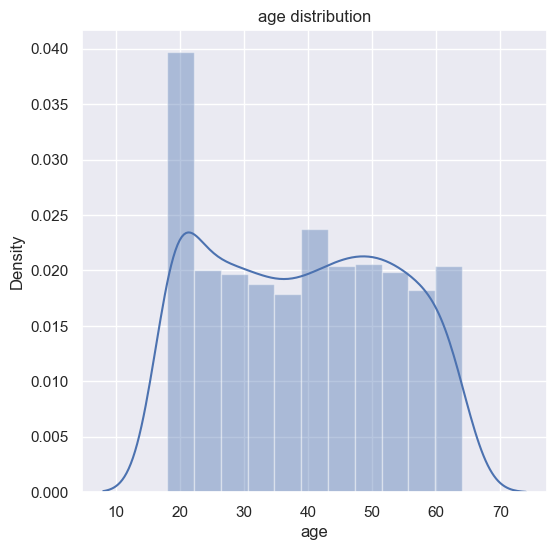

In [10]:
#distribution of age value
sns.set()
plt.figure(figsize=(6,6))
sns.distplot(insurance_dataset["age"])
plt.title("age distribution")
plt.show()

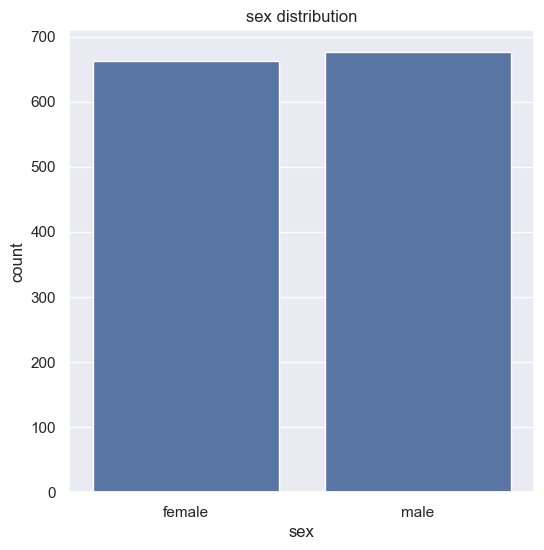

In [11]:
#gender column
plt.figure(figsize=(6,6))
sns.countplot(x="sex",data=insurance_dataset)
plt.title("sex distribution")
plt.show()

In [12]:
insurance_dataset['sex'].value_counts()

sex
male      676
female    662
Name: count, dtype: int64

C:\Users\ShivamShubham\AppData\Local\Temp\ipykernel_11844\3780892752.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(insurance_dataset["bmi"])


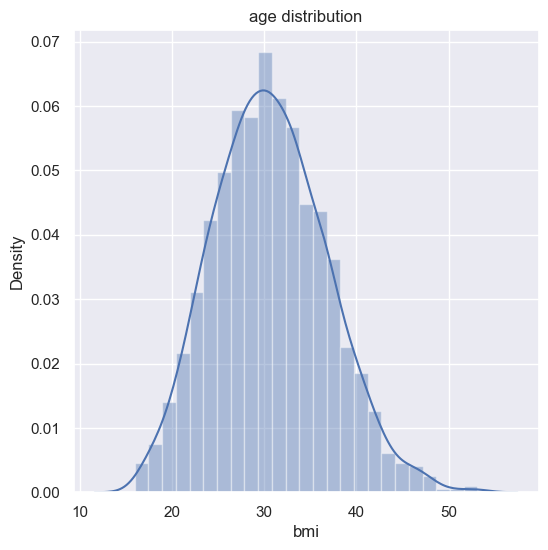

In [13]:
#bmi distribution
sns.set()
plt.figure(figsize=(6,6))
sns.distplot(insurance_dataset["bmi"])
plt.title("age distribution")
plt.show()



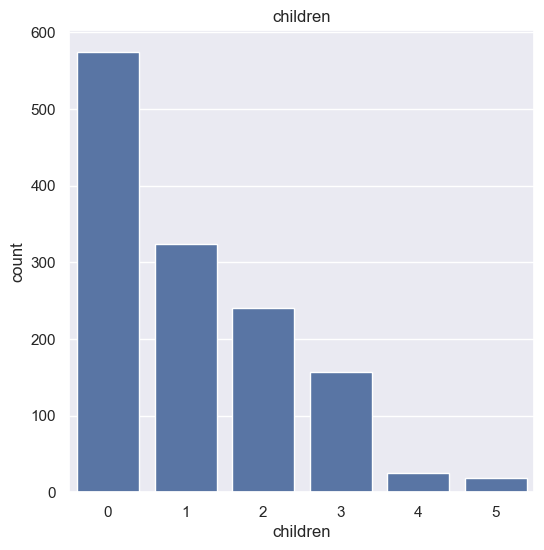

In [14]:
#children column
plt.figure(figsize=(6,6))
sns.countplot(x='children',data=insurance_dataset)
plt.title("children")
plt.show()

In [15]:
insurance_dataset["children"].value_counts()

children
0    574
1    324
2    240
3    157
4     25
5     18
Name: count, dtype: int64

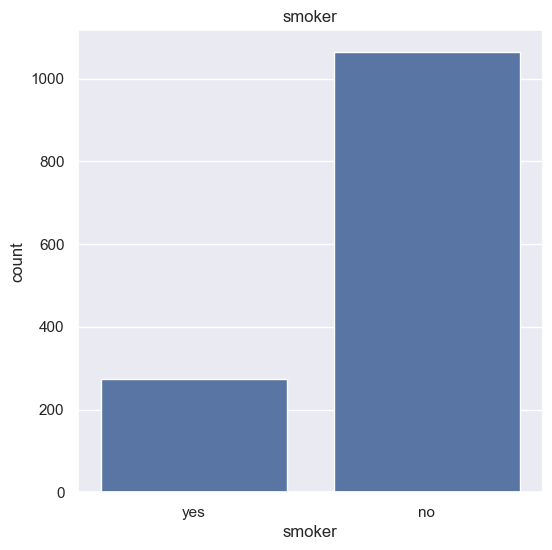

In [16]:
#smoker column
plt.figure(figsize=(6,6))
sns.countplot(x='smoker',data=insurance_dataset)
plt.title("smoker")
plt.show()

In [17]:
insurance_dataset["smoker"].value_counts()

smoker
no     1064
yes     274
Name: count, dtype: int64

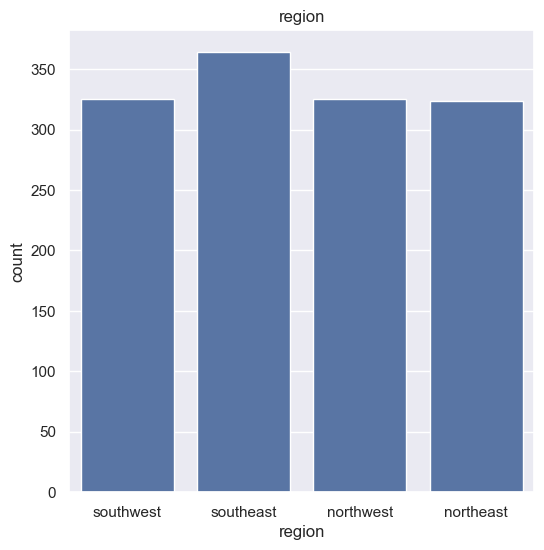

In [18]:
#region column
plt.figure(figsize=(6,6))
sns.countplot(x='region',data=insurance_dataset)
plt.title("region")
plt.show()

In [19]:
insurance_dataset["region"].value_counts()

region
southeast    364
southwest    325
northwest    325
northeast    324
Name: count, dtype: int64

C:\Users\ShivamShubham\AppData\Local\Temp\ipykernel_11844\2225661750.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(insurance_dataset["charges"])


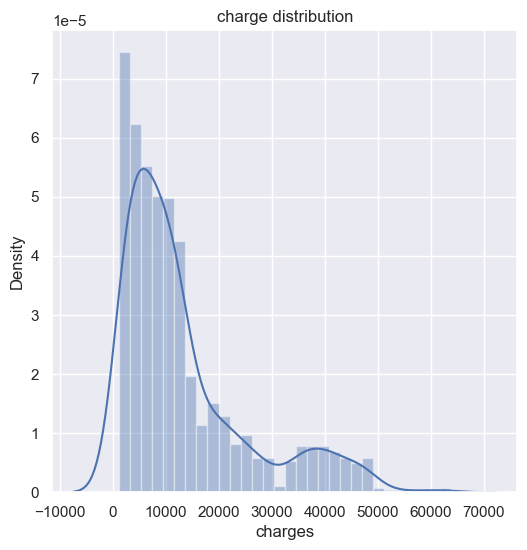

In [20]:
#distribution of charge value
sns.set()
plt.figure(figsize=(6,6))
sns.distplot(insurance_dataset["charges"])
plt.title("charge distribution")
plt.show()

In [21]:
#data preprocessing

In [22]:
'''female=1
male=0
smoker yes=0
smoker no=1'''

'female=1\nmale=0\nsmoker yes=0\nsmoker no=1'

In [23]:
#encoding sex column
insurance_dataset.replace({'sex':{'male':0,'female':1}},inplace=True)
#encoding smoker column
insurance_dataset.replace({'smoker':{'yes':0,'no':1}},inplace=True)
#encoding region column
insurance_dataset.replace({'region':{'southeast':0,'southwest':1,'northeast':2,'northwest':3}},inplace=True)

C:\Users\ShivamShubham\AppData\Local\Temp\ipykernel_11844\3616893119.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  insurance_dataset.replace({'sex':{'male':0,'female':1}},inplace=True)
C:\Users\ShivamShubham\AppData\Local\Temp\ipykernel_11844\3616893119.py:4: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  insurance_dataset.replace({'smoker':{'yes':0,'no':1}},inplace=True)
C:\Users\ShivamShubham\AppData\Local\Temp\ipykernel_11844\3616893119.py:6: FutureWarning: Downcasting behavior in `replace` is deprecated and will be remove

In [24]:
insurance_dataset.head()

,age,sex,bmi,children,smoker,region,charges
0,19,1,27.900,0,0,1,16884.92400
1,18,0,33.770,1,1,0,1725.55230
2,28,0,33.000,3,1,0,4449.46200
3,33,0,22.705,0,1,3,21984.47061
4,32,0,28.880,0,1,3,3866.85520


In [25]:
X=insurance_dataset.drop(columns='charges',axis=1)
Y=insurance_dataset['charges']

print(X)
print(Y)

      age  sex     bmi  children  smoker  region
0      19    1  27.900         0       0       1
1      18    0  33.770         1       1       0
2      28    0  33.000         3       1       0
3      33    0  22.705         0       1       3
4      32    0  28.880         0       1       3
...   ...  ...     ...       ...     ...     ...
1333   50    0  30.970         3       1       3
1334   18    1  31.920         0       1       2
1335   18    1  36.850         0       1       0
1336   21    1  25.800         0       1       1
1337   61    1  29.070         0       0       3

[1338 rows x 6 columns]
0       16884.92400
1        1725.55230
2        4449.46200
3       21984.47061
4        3866.85520
           ...     
1333    10600.54830
1334     2205.98080
1335     1629.83350
1336     2007.94500
1337    29141.36030
Name: charges, Length: 1338, dtype: float64


In [26]:
#spliting data and train 
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=.02,random_state=2)
print(X.shape,X_train.shape,X_test.shape)


(1338, 6) (1311, 6) (27, 6)


In [27]:
#linear regression
regressor=LinearRegression()
regressor.fit(X_train,Y_train)

LinearRegression()

In [28]:
#prediction on training data
training_data_prediction=regressor.predict(X_train)

In [29]:
# R squared value
r2_train=metrics.r2_score(Y_train,training_data_prediction)

In [30]:
print('R squared score :',r2_train)

R squared score : 0.7504635970210644


In [31]:
#prediction on test data
test_data_prediction=regressor.predict(X_test)

In [32]:
#Builduing a predictive system

In [33]:
input_data=(46,1,33.44,1,1,0)

#changing tuple to numpy array
input_data_as_numpy_array=np.asarray(input_data)

In [34]:
#Reshape the array
input_data_reshape=input_data_as_numpy_array.reshape(1,-1)
# find the prediction 
prediction=regressor.predict(input_data_reshape)
print(prediction)

[10692.88638797]


C:\Users\ShivamShubham\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [35]:
print('The insurance cost is USD : ',prediction[0] )

The insurance cost is USD :  10692.886387967155


In [36]:
#saving the trained model 
import pickle

In [37]:
filename='insurance_model.sav'

In [38]:
pickle.dump(regressor,open(filename,'wb'))

In [39]:
#saving loaded model
loaded_model=pickle.load(open('insurance_model.sav','rb'))

In [40]:
input_data=(46,1,33.44,1,1,0)

#changing tuple to numpy array
input_data_as_numpy_array=np.asarray(input_data)
#Reshape the array
input_data_reshape=input_data_as_numpy_array.reshape(1,-1)
# find the prediction 
prediction=regressor.predict(input_data_reshape)
print(prediction)
print('The insurance cost is USD : ',prediction[0] )

[10692.88638797]
The insurance cost is USD :  10692.886387967155


C:\Users\ShivamShubham\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
